In [9]:
#Function to find confidence interval
'''
y_true = numpy array of ground truth labels.Elements should be 0 or 1 in case of classification
y_pred = numpy array of predicted labels
n = number of bootstrap samples(Default 1000)
random_state_seed = Inorder to replicate the results this parameter should be fixed(default 24)
classification_metric = Boolean. Should be set as True if you want to find confidence interval for a 
                        classification metric like precision,recall, AUC etc. (Default True)
alpha = probability of type 1 error. (Default 0.05)

'''

'''
empirical_distribution_gen : function to generate empirical distribution by using bootstrap technique

'''

import numpy as np

def empirical_distribution_gen(y_true,y_pred,n=5000,random_state_seed = 24,classification_metric = False):
    metric_values = [] # list to store metric values
    rand_sampler = np.random.RandomState(random_state_seed) # Setting random state for easy replication
    m = 0
    while m < n:
        if classification_metric:
            if len(np.unique(y_true)) != 2: # to ensure that y_true contains binary labels
                break
            elif len(np.unique(y_true)) == 2:
                idx = rand_sampler.randint(0, len(y_pred), len(y_pred)) # This will generate random sample with replacement of indices 
                y_true_selected = y_true[idx]
                if len(np.unique(y_true_selected)) < 2: # This to ensure that sample drawn has positive as well as negative labels
                    continue
                else:
                    metric_values.append(roc_auc_score(y_true[idx], y_pred[idx]))
                    m += 1
        elif not classification_metric:
            idx = rand_sampler.randint(0, len(y_pred), len(y_pred))
            metric_values.append(mean_absolute_error(y_true[idx], y_pred[idx]))
            m += 1
    
    metric_values = np.array(metric_values)
    metric_values.sort()
    
    return metric_values #This will give an empirical distribution of metric values


'''
conf_int : function to find confidence interval. This is the function you need to call

'''

def conf_int(y_true, y_pred, alpha = 0.05):
    emp_dist = empirical_distribution_gen(y_true, y_pred,classification_metric = True)
    lower_limit = np.quantile(emp_dist,alpha/2)
    upper_limit = np.quantile(emp_dist,1-(alpha/2))
    
    return emp_dist, [np.around(lower_limit,2),np.around(upper_limit,2)]

# Usage example

In [10]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, cohen_kappa_score

y_pred = np.concatenate([[1]*27, [0]*1, [0]*99, [1]*13 ])
y_true = np.concatenate([[1]*28, [0]*112])

In [11]:
ed,cf = conf_int(y_true,y_pred,alpha=0.05) # 95% confidence interval of AUC

In [12]:
cf

[0.87, 0.96]

In [13]:
roc_auc_score(y_pred, y_true)

0.8325

In [9]:
import matplotlib.pyplot as plt

(array([  5.,   0.,   0.,   4.,  10.,   4.,   5.,  14.,  18.,   6.,  24.,
         42.,  44.,  70.,   1., 136., 146.,  57., 179., 151., 153., 484.,
        174., 295., 398., 539., 256., 463., 336., 986.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

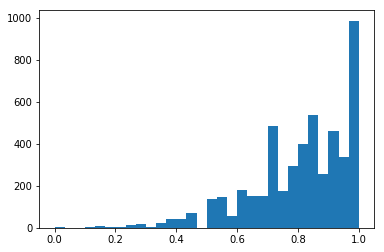

In [11]:
plt.hist(ed,bins=30)

In [14]:
import pandas as pd

df=pd.read_csv('/opt/bucketdata/Users/Rohit/Covid19/CT_new/csv/github_covid_7Apr2020_12h43m.csv')

In [15]:
df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,2019-novel-Coronavirus-severe-adult-respirator...,224115,{},1,0,"{""name"":""polygon"",""all_points_x"":[51,21,60,137...",{}
1,2019-novel-Coronavirus-severe-adult-respirator...,209383,{},1,0,"{""name"":""polygon"",""all_points_x"":[75,34,54,101...",{}
2,2019-novel-Coronavirus-severe-adult-respirator...,202531,{},1,0,"{""name"":""polygon"",""all_points_x"":[41,21,53,100...",{}
3,2020.01.24.919183-p27-132.png,333798,{},2,0,"{""name"":""polygon"",""all_points_x"":[293,205,135,...",{}
4,2020.01.24.919183-p27-132.png,333798,{},2,1,"{""name"":""polygon"",""all_points_x"":[477,449,467,...",{}


In [18]:
filenames=[]
for idx, row in df.iterrows():
    if row['region_count'] > 0:
        filenames.append(row['filename'])

In [19]:
len(set(filenames))

271

In [20]:
271/349

0.7765042979942693